In [1]:
import pandas as pd

# Create a realistic dummy dataset with 6 features for an e-commerce platform
data = {
    'Session_Duration': [23, 45, 15, 67, 34, 23, 56, 23, 45, 12, 24, 38, 25, 32, 64, 58, 45, 43, 47, 52],
    'Pages_Visited': [5, 8, 2, 10, 7, 5, 9, 4, 6, 2, 5, 7, 3, 5, 9, 10, 8, 7, 6, 9],
    'Items_in_Cart': [3, 6, 1, 9, 4, 3, 7, 2, 5, 1, 4, 5, 2, 4, 8, 9, 7, 6, 5, 8],
    'Avg_Session_Value': [100, 300, 80, 450, 200, 110, 390, 90, 250, 60, 110, 230, 100, 180, 400, 410, 360, 320, 310, 380],
    'Time_Spent_on_Site': [150, 180, 70, 230, 140, 120, 200, 90, 170, 60, 110, 160, 100, 130, 240, 250, 210, 190, 180, 220],
    'Purchase_History': [5, 12, 2, 15, 10, 5, 14, 4, 10, 2, 6, 11, 3, 7, 13, 14, 12, 10, 11, 13]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

,Session_Duration,Pages_Visited,Items_in_Cart,Avg_Session_Value,Time_Spent_on_Site,Purchase_History
0,23,5,3,100,150,5
1,45,8,6,300,180,12
2,15,2,1,80,70,2
3,67,10,9,450,230,15
4,34,7,4,200,140,10


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

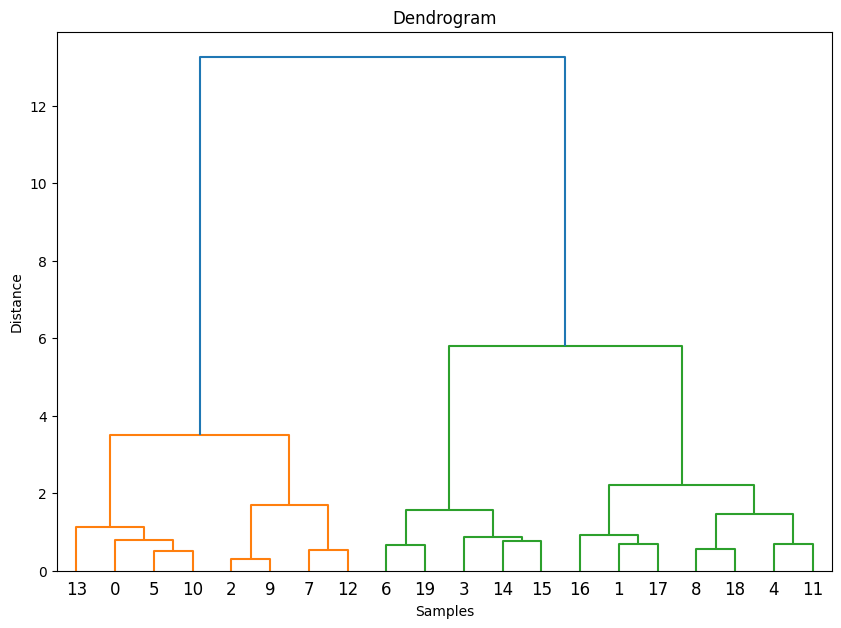

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using Ward's method
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [4]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Display the clustered data
df.head()

,Session_Duration,Pages_Visited,Items_in_Cart,Avg_Session_Value,Time_Spent_on_Site,Purchase_History,Cluster
0,23,5,3,100,150,5,1
1,45,8,6,300,180,12,0
2,15,2,1,80,70,2,1
3,67,10,9,450,230,15,0
4,34,7,4,200,140,10,0


In [5]:
cluster_names = {0: 'High-Value Shoppers', 1: 'Casual Browsers'}
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

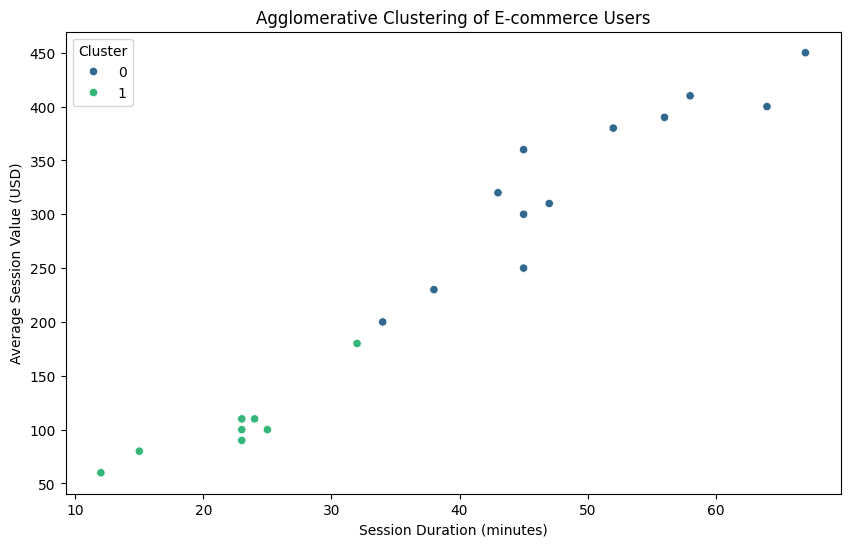

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Session_Duration'], y=df['Avg_Session_Value'], hue=df['Cluster'], palette='viridis')
plt.title('Agglomerative Clustering of E-commerce Users')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Average Session Value (USD)')
plt.show()